In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create a DataFrame from your data
data = pd.DataFrame({
    'Date': pd.date_range(start='2020-03-01', end='2021-09-01', freq='M'),
    'GDP': [92.3, 74.9, 77.0, 84.2, 90.8, 92.8, 94.4, 95.1, 92.9, 93.8, 91.5, 92.3, 94.2, 96.9, 97.5, 98.9, 98.8, 99.2]
})

# Set the date column as the index
data.set_index('Date', inplace=True)

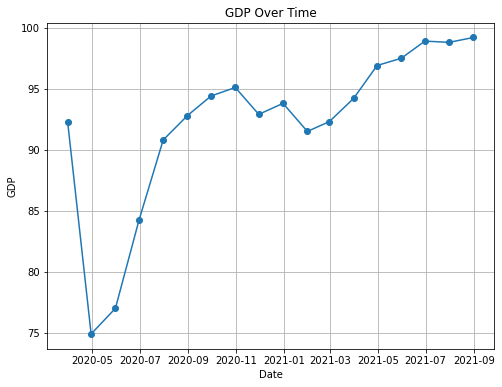

In [3]:
plt.figure(figsize=(8, 6))
plt.plot(data.index, data['GDP'], marker='o')
plt.title('GDP Over Time')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.grid(True)
plt.show()


In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['GDP'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -0.2067148255382063
p-value: 0.9377164807227452


In [5]:
data['GDP_diff'] = data['GDP'] - data['GDP'].shift(1)
data.dropna(inplace=True)

# Re-run the Dickey-Fuller test
result_diff = adfuller(data['GDP_diff'])
print(f'ADF Statistic (after differencing): {result_diff[0]}')
print(f'p-value (after differencing): {result_diff[1]}')

ADF Statistic (after differencing): -2.87957614305051
p-value (after differencing): 0.04777508440832754


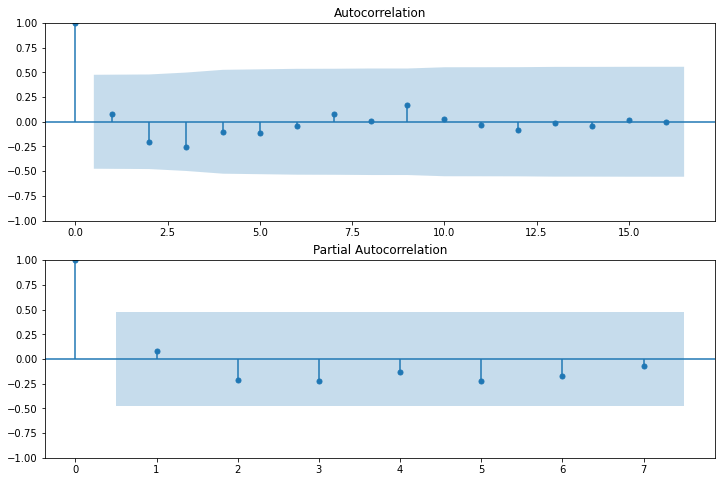

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(data['GDP_diff'], ax=ax1, lags=16)
plot_pacf(data['GDP_diff'], ax=ax2, lags=7)

plt.show()


In [7]:
# Example: ARIMA(1,1,1) model
model = sm.tsa.ARIMA(data['GDP'], order=(1,1,1))
results = model.fit()

# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   17
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -35.754
Date:                Fri, 16 Feb 2024   AIC                             77.508
Time:                        19:17:32   BIC                             79.826
Sample:                    04-30-2020   HQIC                            77.627
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6457      0.459      1.407      0.160      -0.254       1.545
ma.L1         -0.0622      0.606     -0.103      0.918      -1.249       1.125
sigma2         4.9658      1.738      2.857      0.0

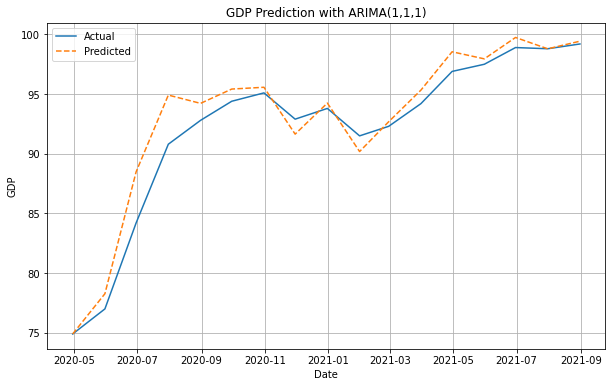

In [8]:
# Predictions
predictions = results.predict(start=1, end=len(data))

# Plot predictions vs. actual data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['GDP'], label='Actual')
plt.plot(data.index, predictions, label='Predicted', linestyle='--')
plt.title('GDP Prediction with ARIMA(1,1,1)')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()